In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [224]:
def plot_results(subplot_data, titles, overall_title):
    """
    Plot the visualization for all cases of Outcomes and Disparities 
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        for x_vals, y_vals, label in subplot_data[i]:
            ax.plot(x_vals, y_vals, marker='o', label=label)

        ax.set_title(titles[i])
        row = i // 2

        if row == 0:
            ax.set_xlabel(r'$\mu_A / \mu_B$')  # Mortality disparity
        else:
            ax.set_xlabel(r'$\beta_A / \beta_B$')  # Transmission disparity

        ax.set_ylabel('% Increase in CoF')
        ax.legend(fontsize='x-small', markerscale=0.7, labelspacing=0.3, handlelength=1.5)
        ax.grid(True)

    fig.text(0.5, 0.008, 'Outcome Metric', ha='center', fontsize=12)
    fig.text(0.008, 0.5, 'Disparity Metric', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(overall_title, fontsize=16, y=0.90)

    plt.tight_layout(rect=[0.04, 0.04, 0.96, 0.91]) 
    plt.show()

In [225]:
def plot_single_result(data, title):
    plt.figure(figsize=(8, 6))

    for x_vals, y_vals, label in data:
        plt.plot(x_vals, y_vals, marker='o', label=label)

    plt.title(title)
    plt.xlabel("Disparity Metric: Mortality Rate")
    plt.ylabel("Outcome Metric: Deaths")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [235]:
def plot_heatmap(x, y, values, title, x_label): 
    plt.figure(figsize=(8, 6))
    sns.heatmap(values, annot=True, fmt=".2f", xticklabels=x, yticklabels=y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Cost of Fairness")
    plt.tight_layout()
    plt.show()

In [227]:
def compute_percent(with_equity, without): 
    """
    Helper function to compute the percent increase of the cost of fairness 
    """
    percent_increase = []
    for i in range(len(with_equity)): 
        percent_increase.append((with_equity[i] - without[i]) / without[i])
    return percent_increase

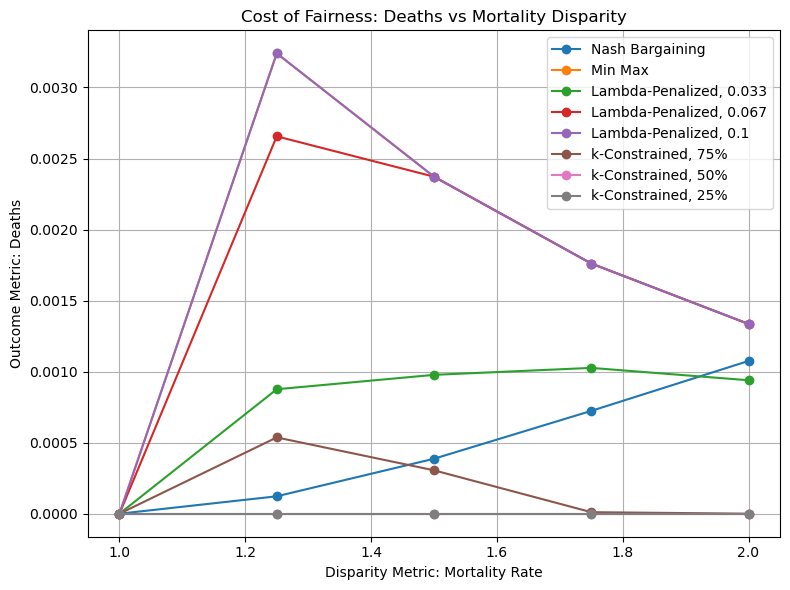

In [228]:
subplot_1_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
]

plot_single_result(subplot_1_data, "Cost of Fairness: Deaths vs Mortality Disparity")

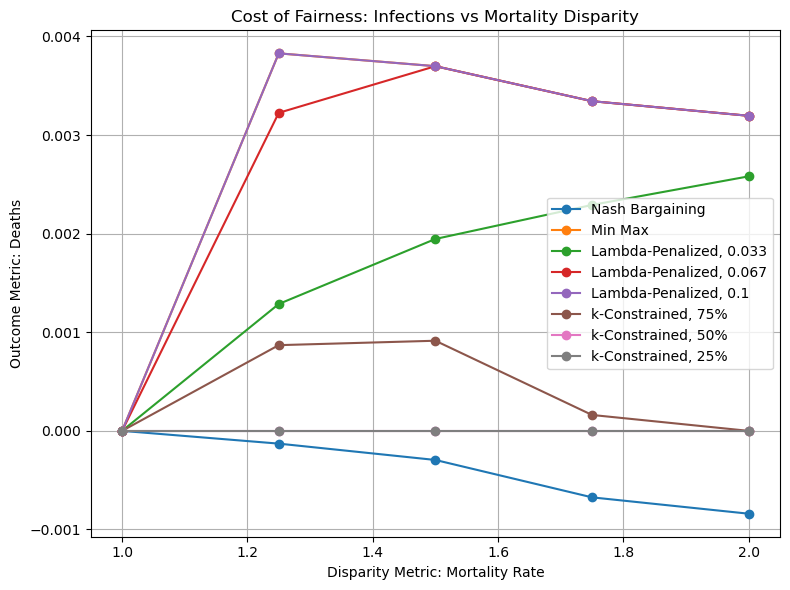

In [229]:
subplot_2_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
]

plot_single_result(subplot_2_data, "Cost of Fairness: Infections vs Mortality Disparity")

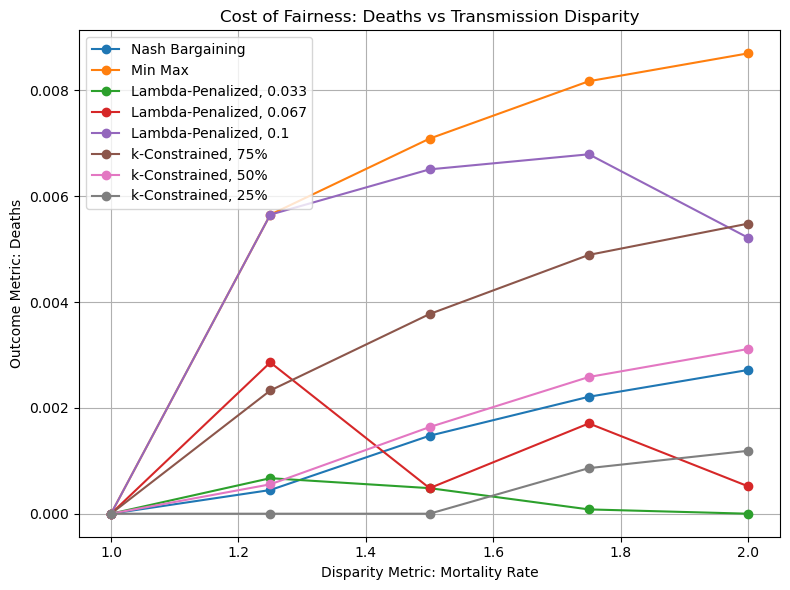

In [230]:
subplot_3_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
]

plot_single_result(subplot_3_data, "Cost of Fairness: Deaths vs Transmission Disparity")

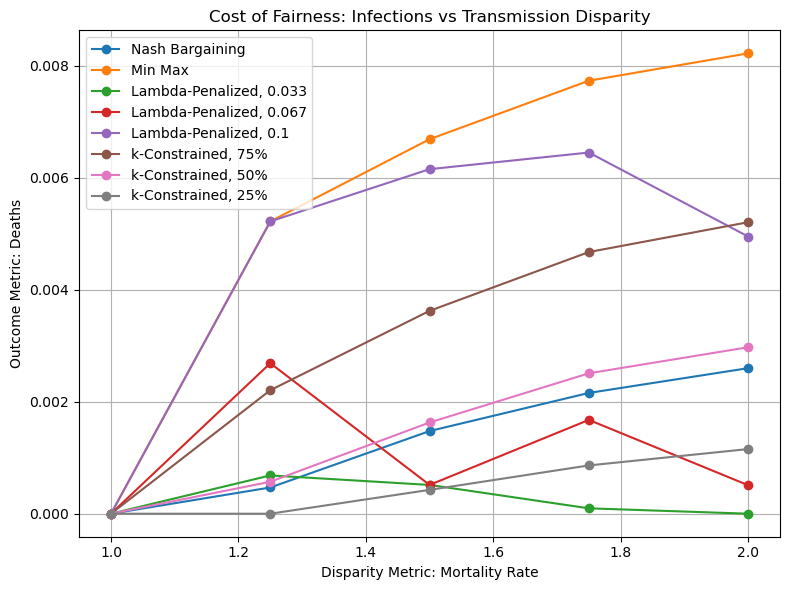

In [231]:
subplot_4_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
]

plot_single_result(subplot_4_data, "Cost of Fairness: Infections vs Transmission Disparity")

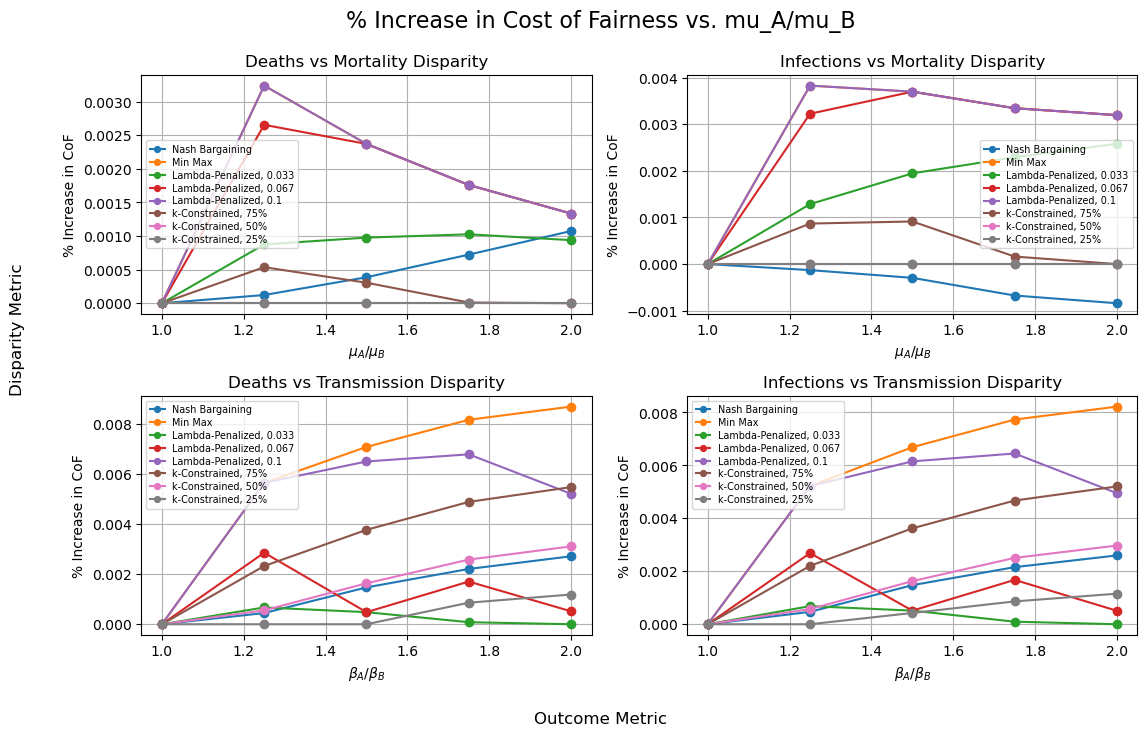

In [ ]:
titles = [
    "Deaths vs Mortality Disparity",
    "Infections vs Mortality Disparity",
    "Deaths vs Transmission Disparity",
    "Infections vs Transmission Disparity"
]

subplot_data = [ # This is where the results of the simulation will be plotted 
    [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
        
    ],
    [  # Subplot 2: Infections vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
    ],
    [  # Subplot 3: Deaths vs Transmission Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
    ],
    [  # Subplot 4: Infections vs Transmission Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
    ]
]

plot_results(subplot_data, titles, '% Increase in Cost of Fairness vs. mu_A/mu_B')

In [ ]:
values = np.array([

])

x = [1, 1.25, 1.5, 1.75, 2]
y= ["Nash Bargaining", "Min Max", "Lambda-Penalized, 0.033", "Lambda-Penalized, 0.067", "Lambda-Penalized, 0.1", "k-Constrained, 75%", "k-Constrained, 50%", "k-Constrained, 25%"]